## Student Performance Indicator
### Life cycle of Machine learning Project
    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

Show Top 5 Records

In [4]:

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

####  2.2 Dataset information
        gender : sex of students -> (Male/female)
        race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
        parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
        lunch : having lunch before test (standard or free/reduced)
        test preparation course : complete or not complete before test
        math score
        reading score
        writing score

### 3. Data Checks to perform
        Check Missing values
        Check Duplicates
        Check data type
        Check the number of unique values of each column
        Check statistics of data set
        Check various categories present in the different categorical column

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
gender_category = df['gender'].unique()
race_ethnicity_category = df['race_ethnicity'].unique()
parental_level_of_education_category = df['parental_level_of_education'].unique()
lunch__category = df['lunch'].unique()
test_preparation_course_category = df['test_preparation_course'].unique()


print(f'categories in gender: {gender_category}')
print(f'categories in race_ethnicity: {race_ethnicity_category}')
print(f'categories in parental_level_of_education: {parental_level_of_education_category}')
print(f'categories in lunch__category: {lunch__category}')
print(f'categories in test_preparation_course: {test_preparation_course_category}')


categories in gender: ['female' 'male']
categories in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch__category: ['standard' 'free/reduced']
categories in test_preparation_course: ['none' 'completed']


In [13]:
## define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numeric_features)

['math_score', 'reading_score', 'writing_score']


In [14]:
non_numeric_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(non_numeric_features)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# 3.8 Adding columns for "Total Score" and "Average"

In [16]:
total_score = df['math_score']+df['reading_score']+df['writing_score']
avg_score = total_score/len(numeric_features)


In [17]:
print(avg_score)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64


In [18]:
df['Average'] = avg_score
df['total_score'] = total_score

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


#### find out the students who got full marks in math_score = 100

In [20]:
full_math_score = len(df[df['math_score']==100])
print(f'number of student that got full marks in math: {full_math_score}')

number of student that got full marks in math: 7


In [21]:
full_reading_score = len(df[df['reading_score']==100])
print(f'number of student that got full marks in reading: {full_reading_score}')

number of student that got full marks in reading: 17


In [22]:
full_writing_score = len(df[df['writing_score']==100])
print(f'number of student that got full marks in writing: {full_writing_score}')

number of student that got full marks in writing: 14


#### find out the student that got less than 20 in three module:

In [23]:
math_less_20 = len(df[df['math_score']<= 20])
print(f'number of student that got less than 20 marks in math: {math_less_20}')
reading_less_20 = len(df[df['reading_score']<= 20])
print(f'number of student that got less than 20 marks in reading: {reading_less_20}')
writing_less_20 = len(df[df['writing_score']<= 20])
print(f'number of student that got less than 20 marks in writing: {writing_less_20}')

number of student that got less than 20 marks in math: 4
number of student that got less than 20 marks in reading: 1
number of student that got less than 20 marks in writing: 3


##### Insights : 
    1.majority student did worst in math 
    2. majority student did good in reading 

### 4. Exploring Data ( Visualization )

#### 4.1 Visualize average score distribution to make some conclusion.
    Histogram
    Kernel Distribution Function (KDE)

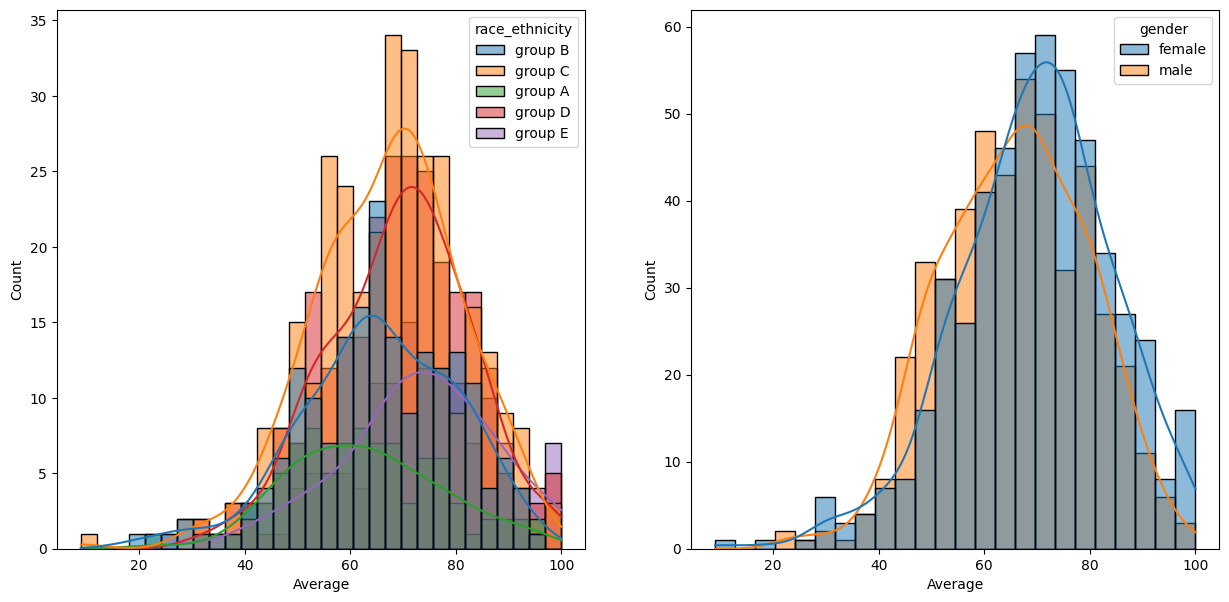

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g' ,hue = 'race_ethnicity')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

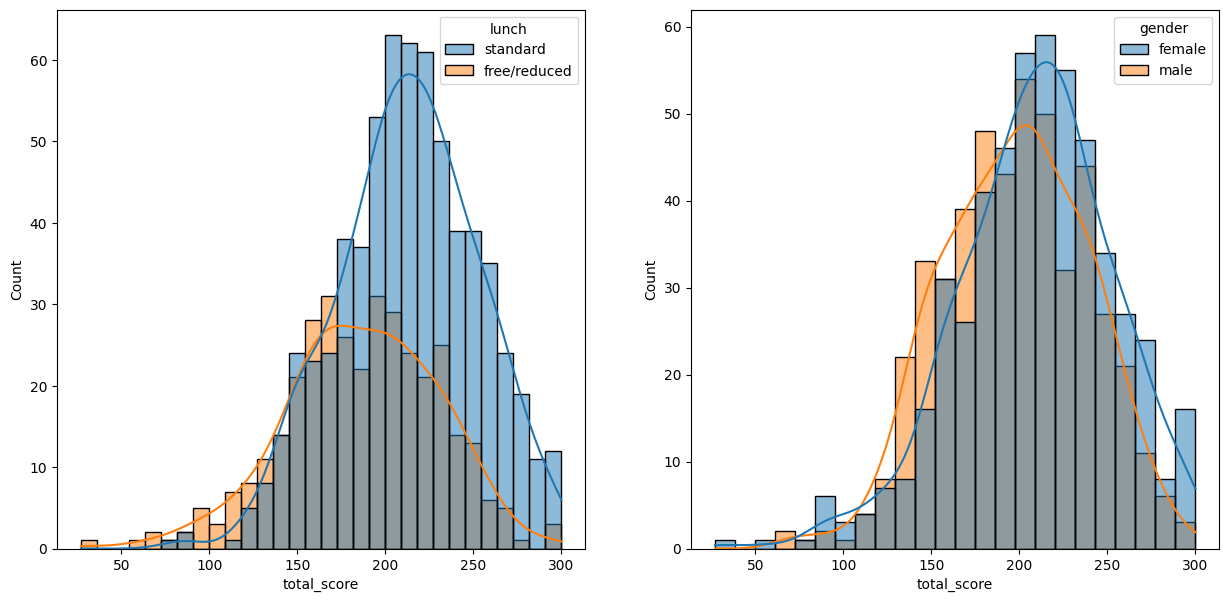

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g', hue = 'lunch')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

## insights
    1. standurd lunc did the good result than the free/reduce students
    2. on the other hand female did the good result than the male students

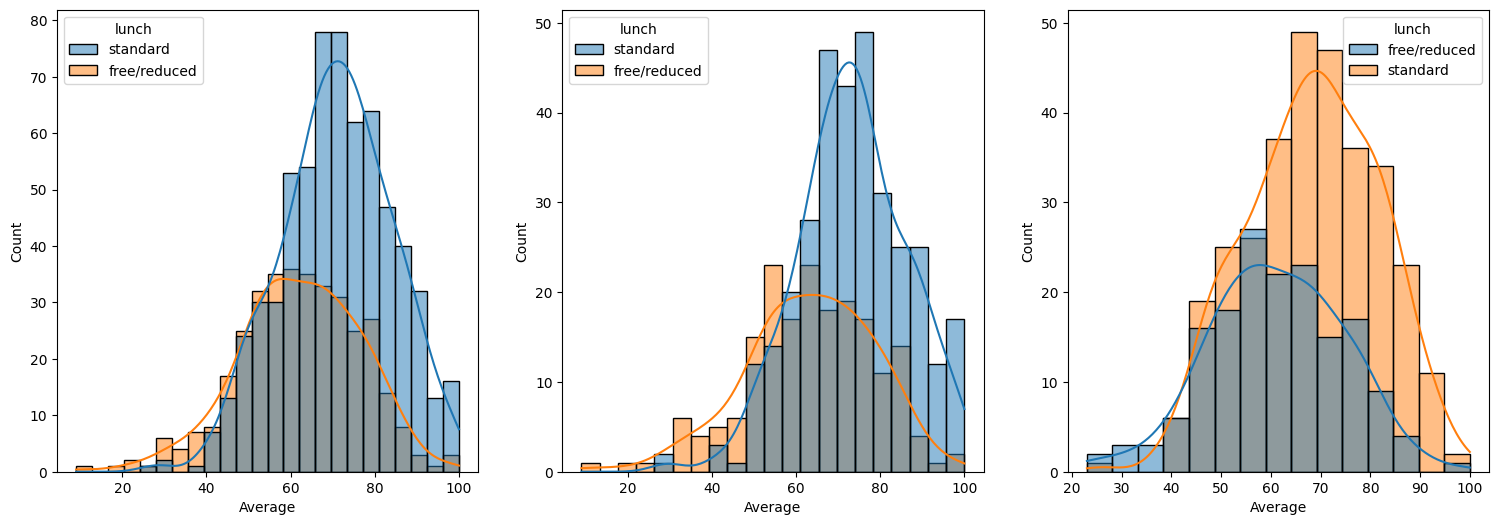

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

### Insights
    Standard lunch helps perform well in exams.
    Standard lunch helps perform well in exams be it a male or a female.

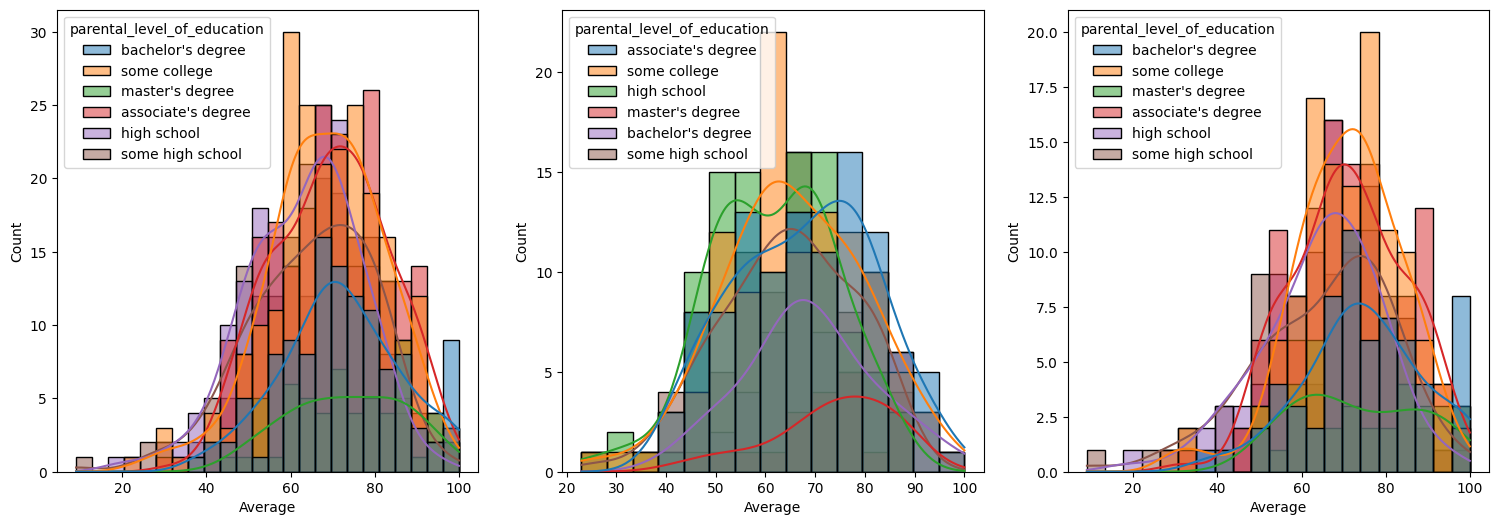

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
    In general parent's education don't help student perform well in exam.
    2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
    3rd plot we can see there is no effect of parent's education on female students.

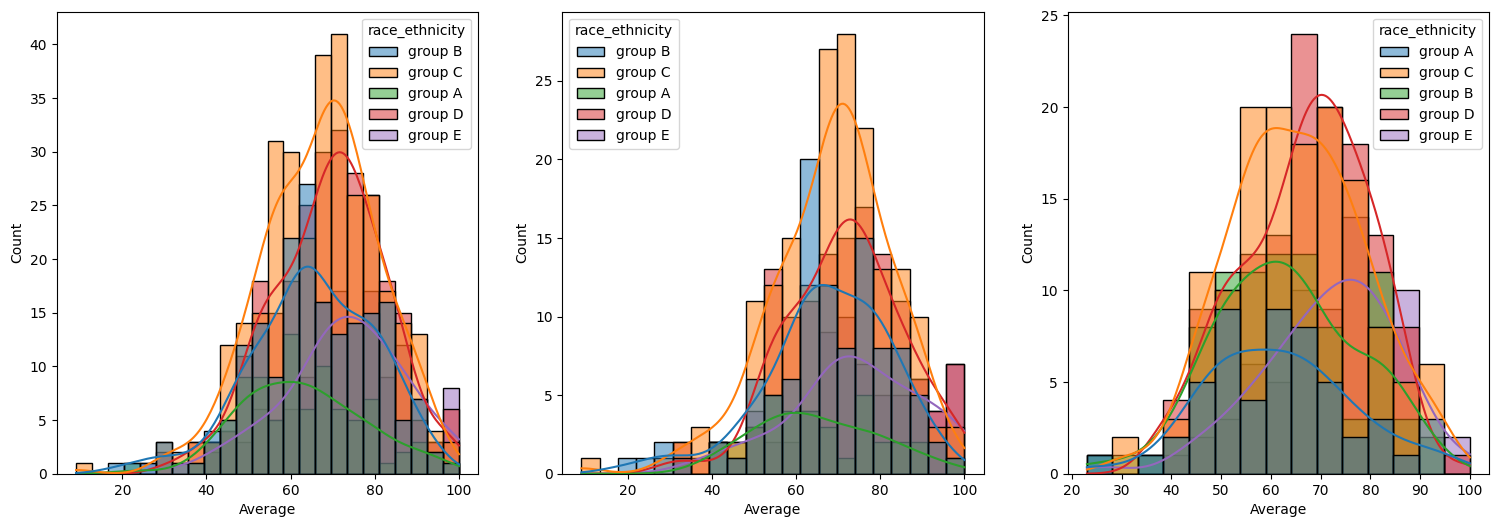

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

#### Insights
    Students of group A and group B tends to perform poorly in exam.
    Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

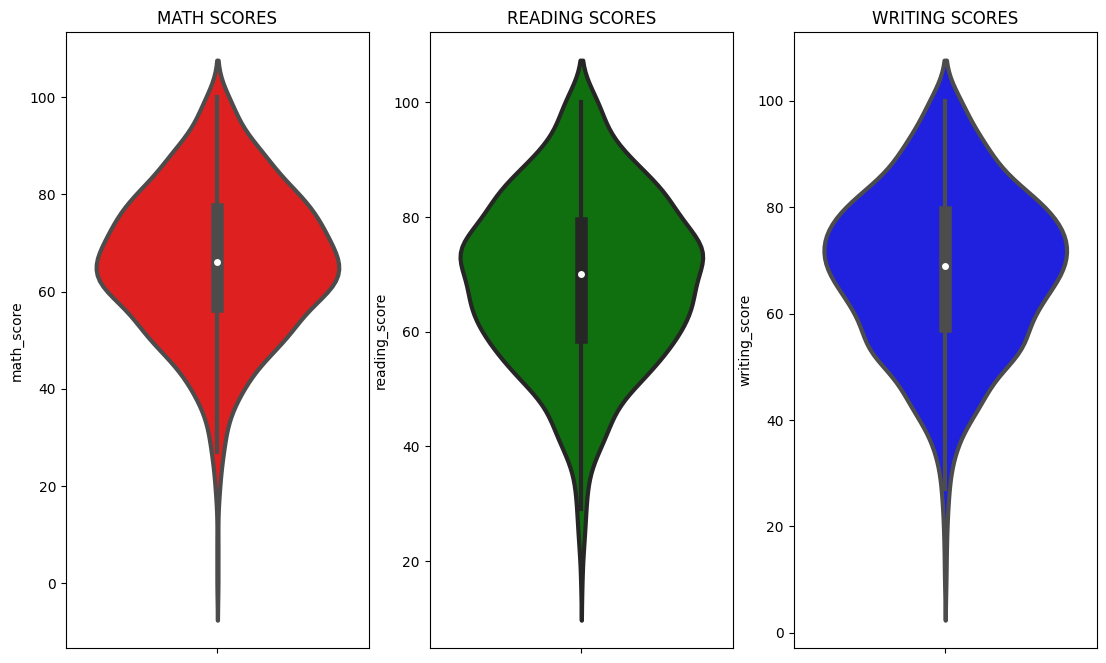

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
    From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

###  4.3 Multivariate analysis using pieplot

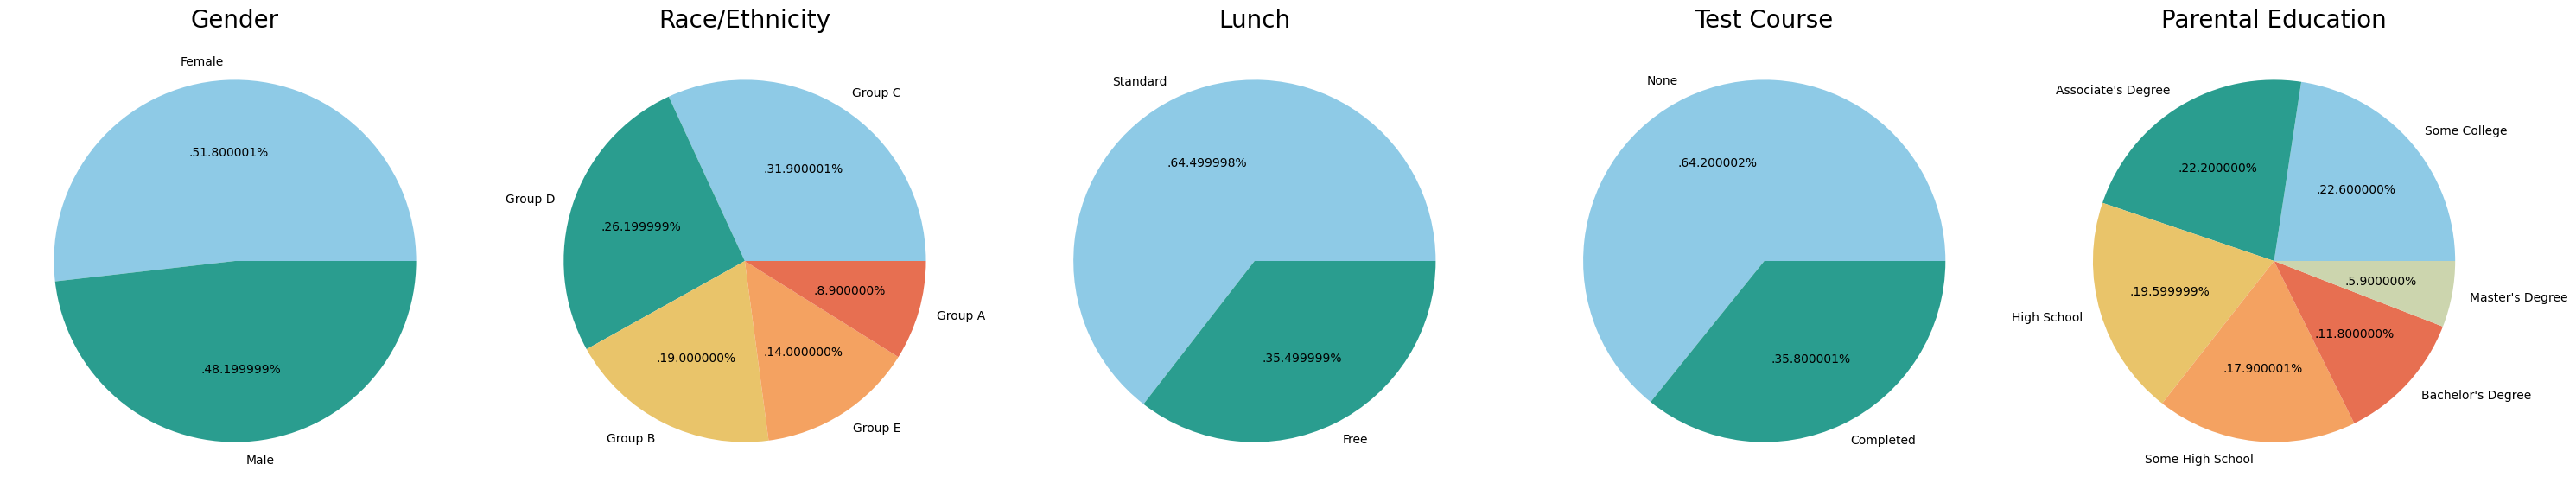

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['#8ecae6','#2a9d8f']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['#8ecae6','#2a9d8f','#e9c46a','#f4a261','#e76f51']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['#8ecae6','#2a9d8f']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['#8ecae6','#2a9d8f']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['#8ecae6','#2a9d8f','#e9c46a','#f4a261','#e76f51','#ccd5ae']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
    Number of Male and Female students is almost equal
    Number students are greatest in Group C
    Number of students who have standard lunch are greater
    Number of students who have not enrolled in any test preparation course is greater
    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization


#### 4.4.1 GENDER COLUMN
    How is distribution of Gender ?
    Is gender has any impact on student's performance ?

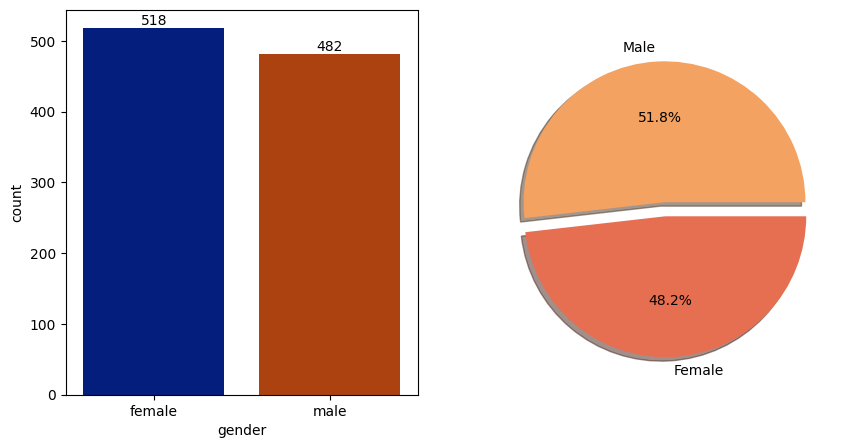

In [31]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='dark',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#f4a261','#e76f51'])
plt.show()

#### Insights
    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### 4.4.2 RACE/EHNICITY COLUMN
    How is Group wise distribution ?
    Is Race/Ehnicity has any impact on student's performance ?

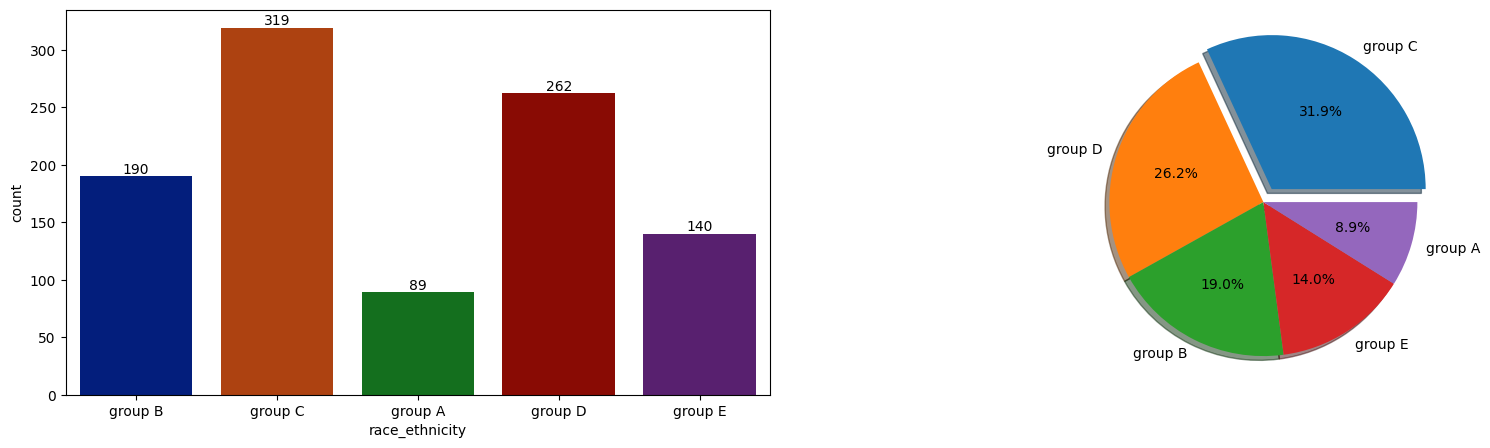

In [32]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'dark',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
    Most of the student belonging from group C /group D.
    Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

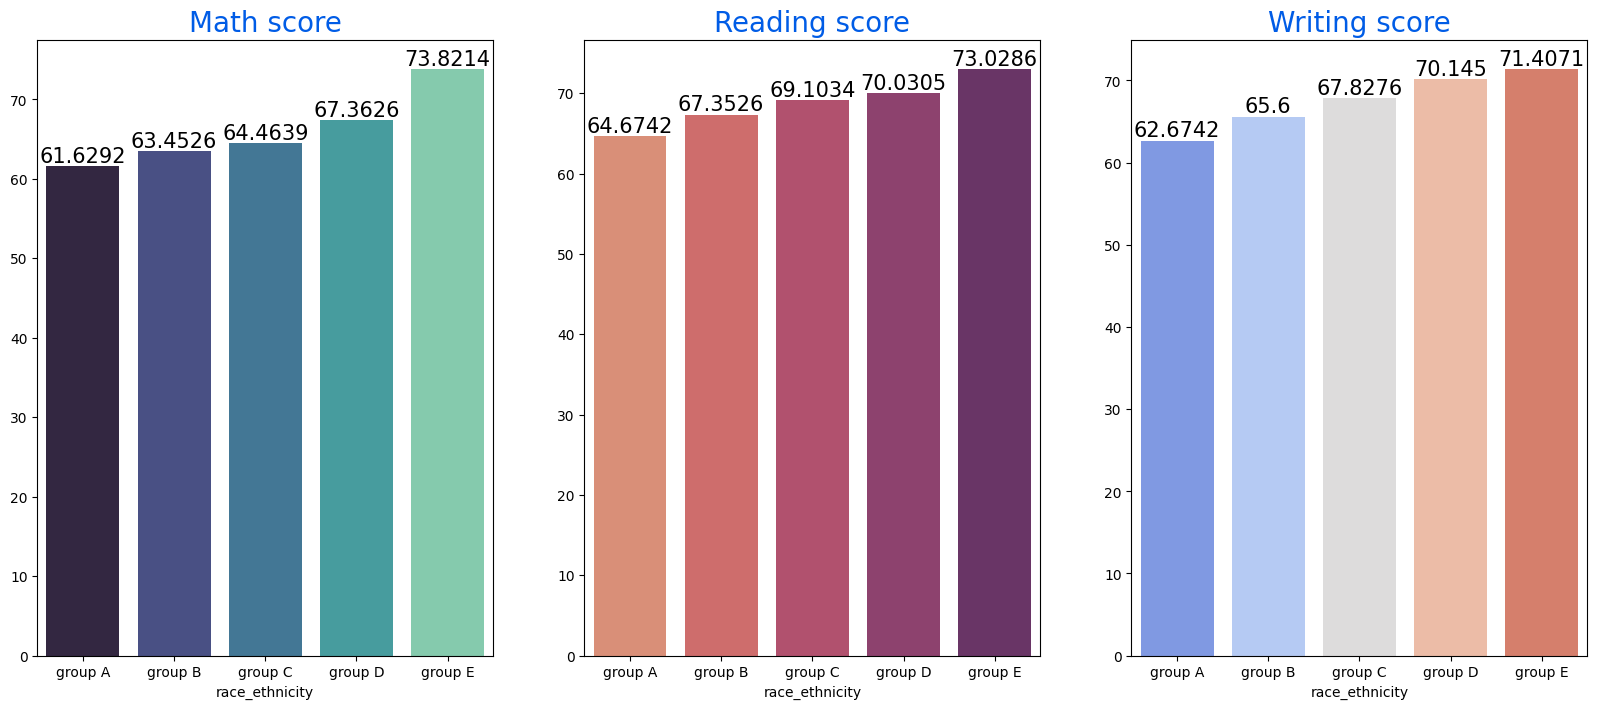

In [33]:

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insight:
    group E perform best among the following.
    Group A students have scored the lowest marks.

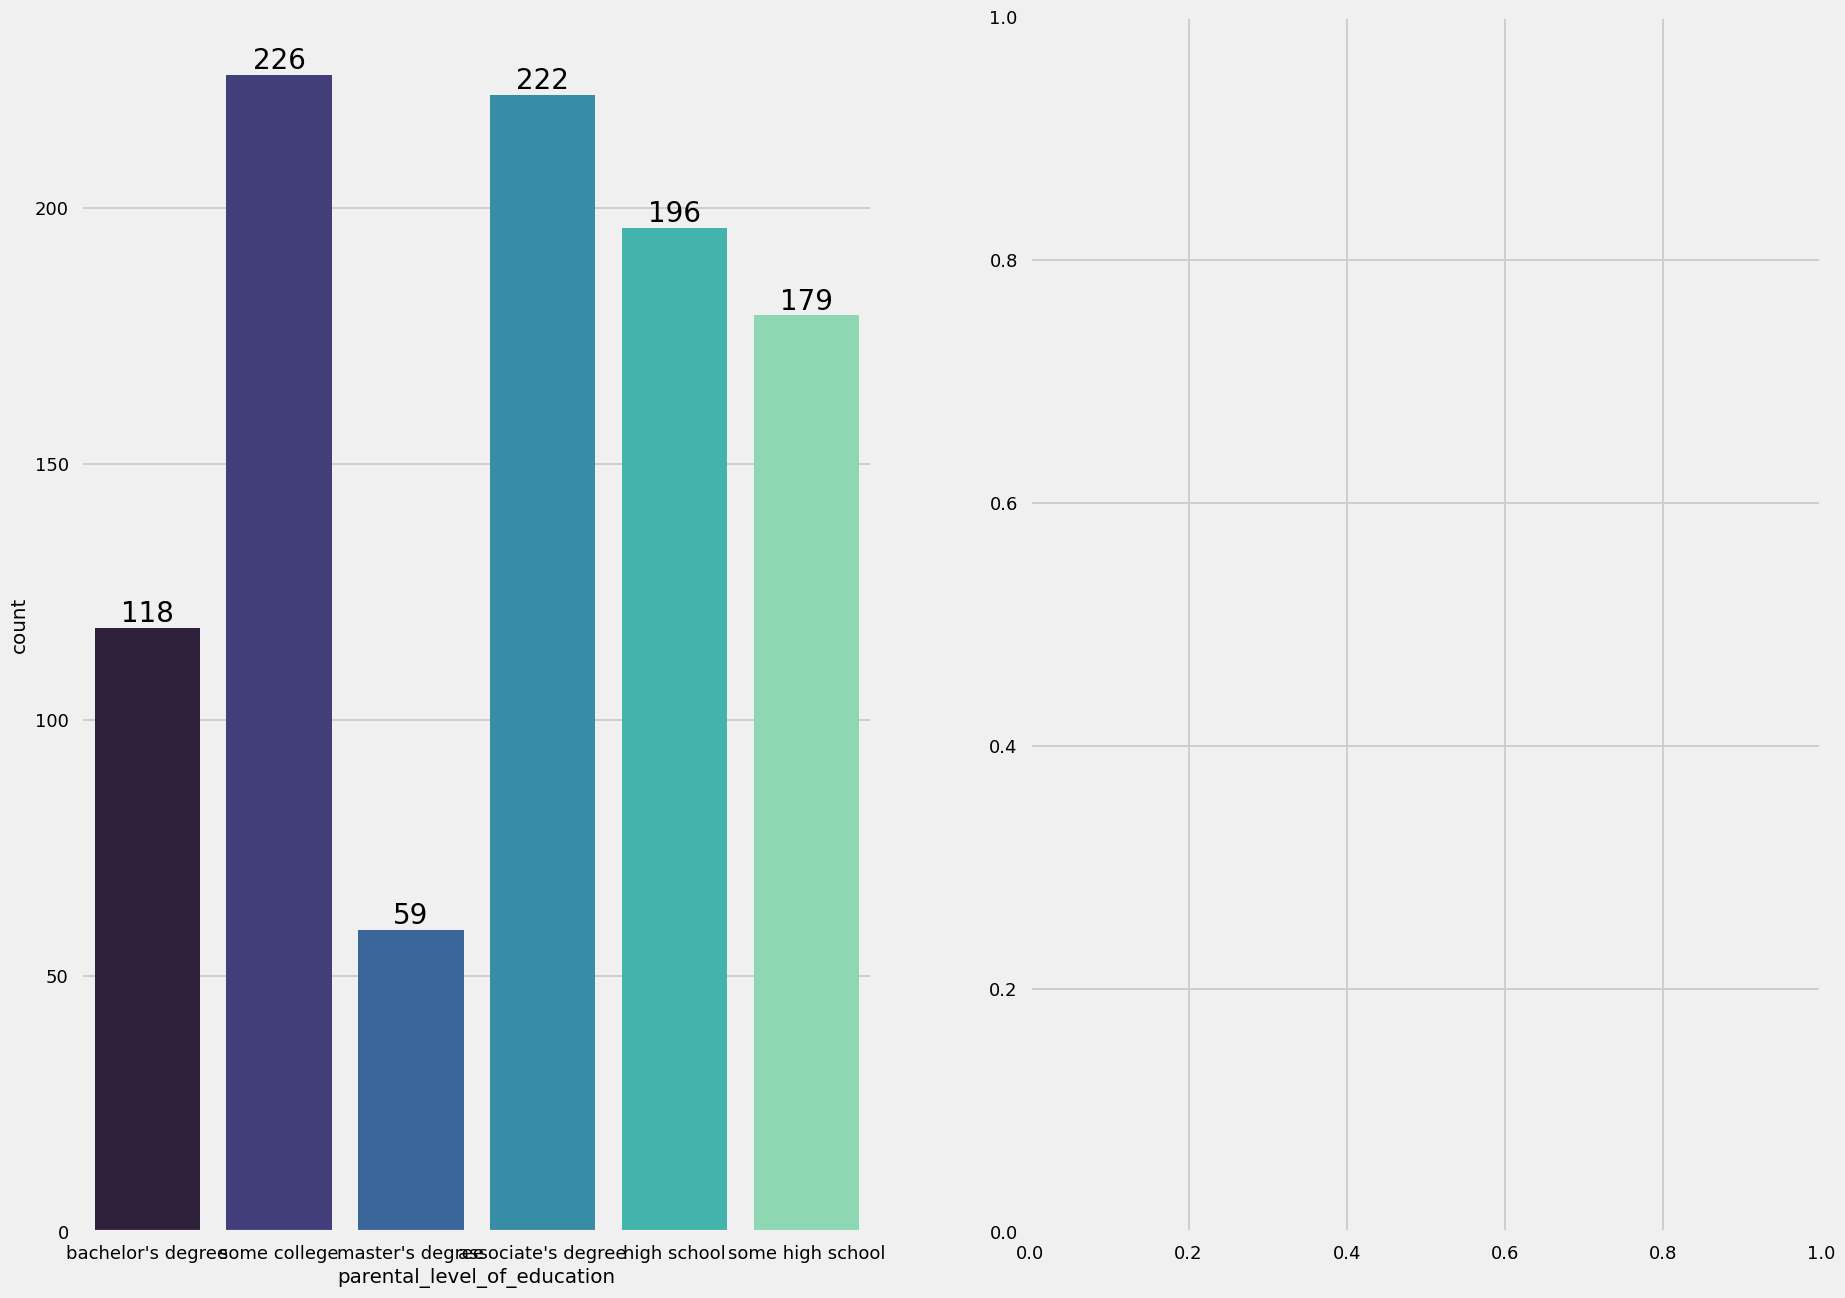

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,15))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'mako',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    


### Insights
    most of the students parents educational background is some college

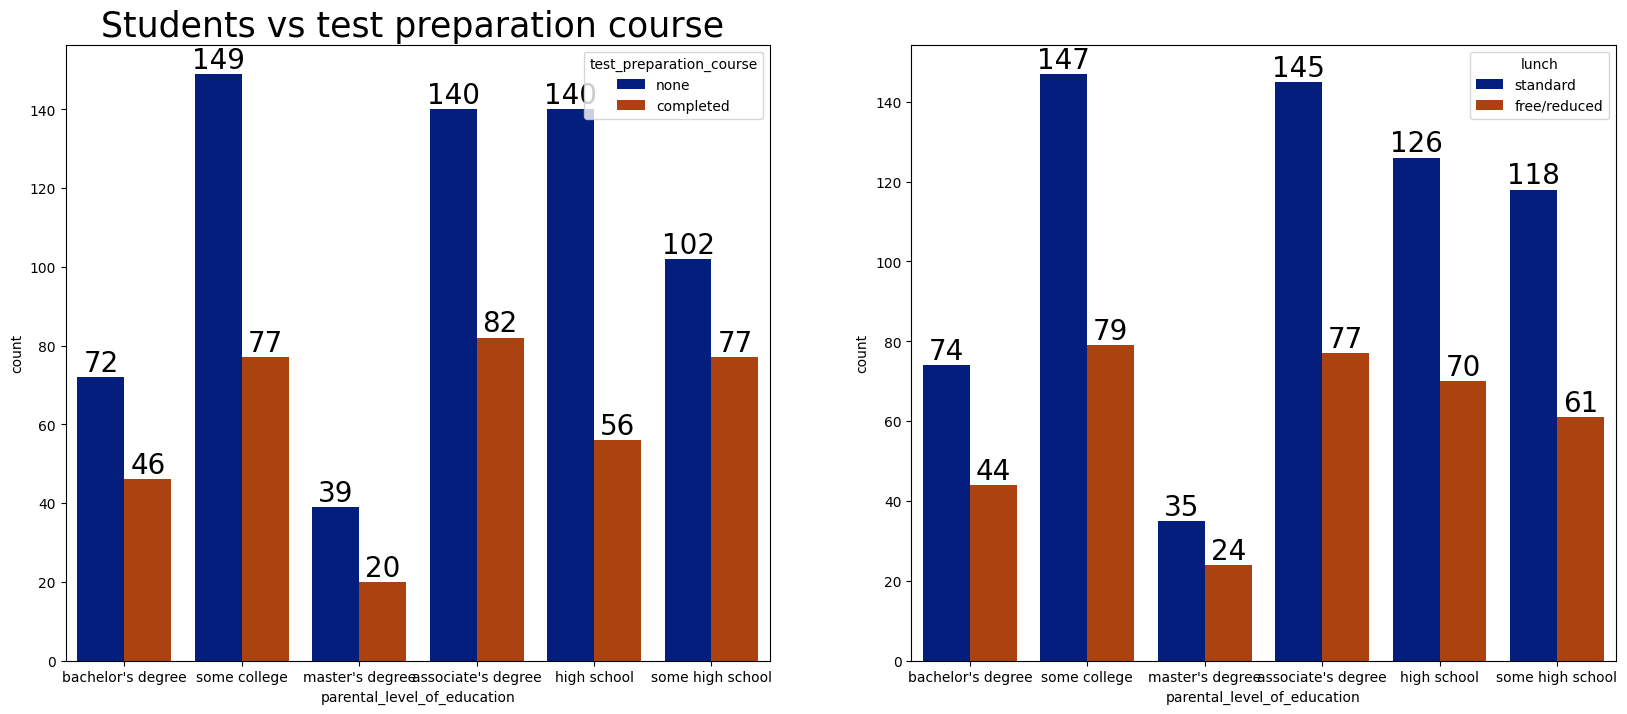

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'dark',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'dark',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


<Axes: xlabel='lunch', ylabel='writing_score'>

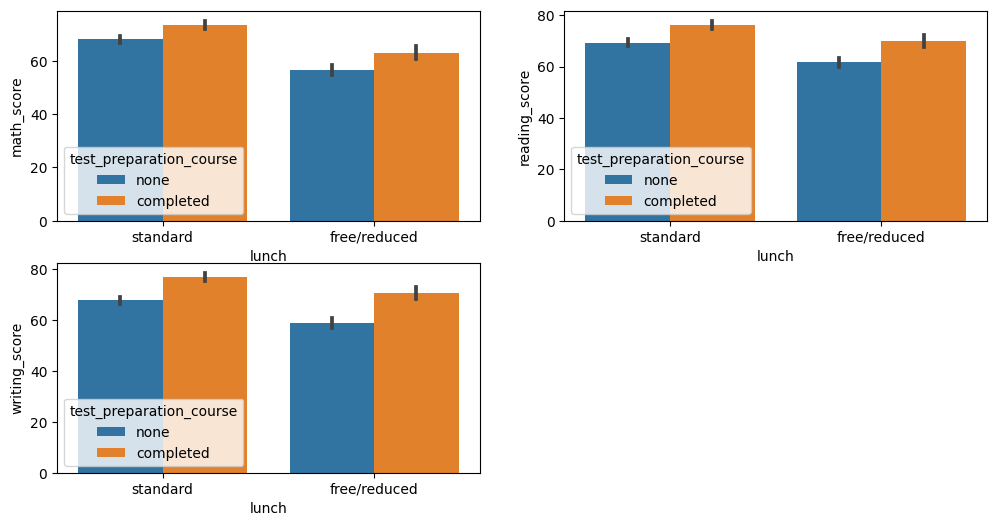

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## 4.4.6 CHECKING OUTLIERS

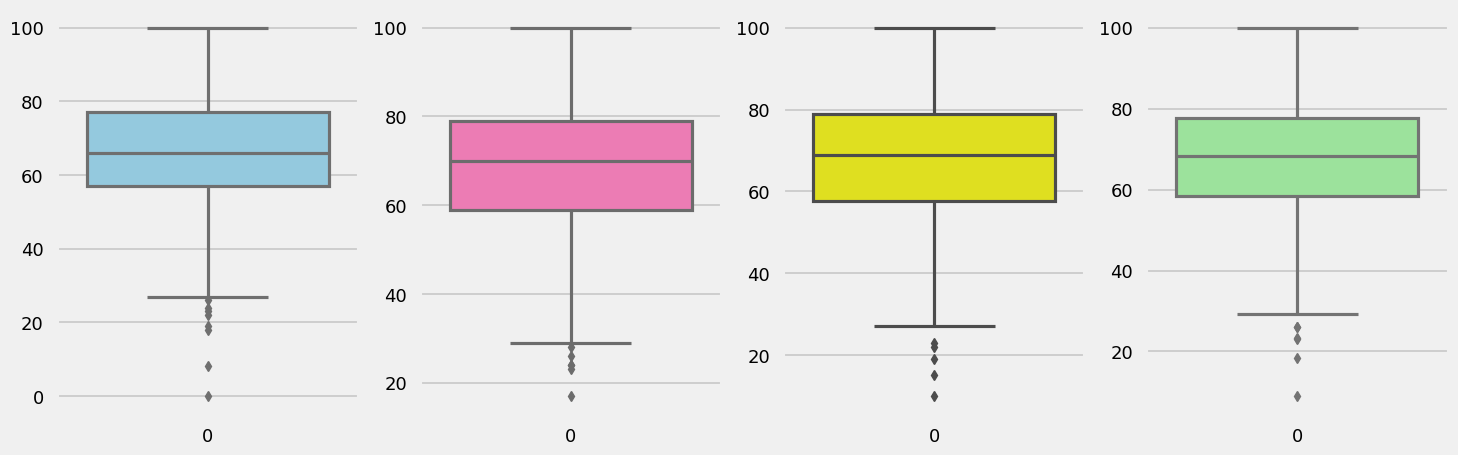

In [48]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

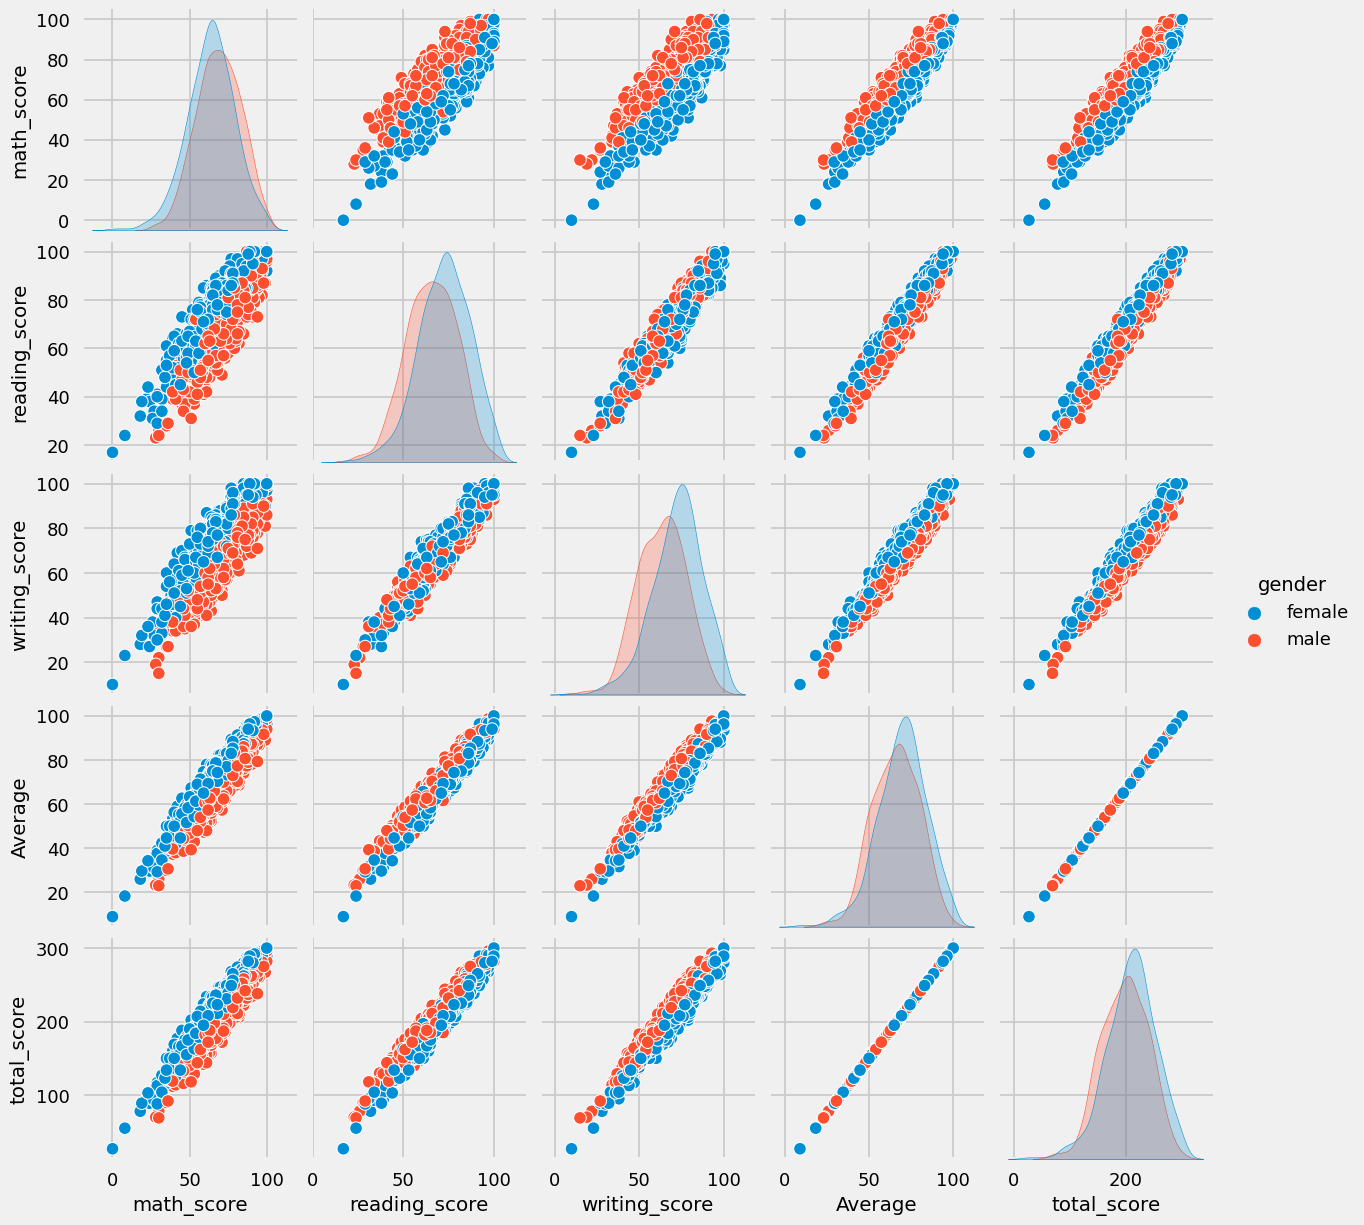

In [49]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights
    From the above plot it is clear that all the scores increase linearly with each other.
# 5. Conclusions
    Student's Performance is related with lunch, race, parental level education
    Females lead in pass percentage and also are top-scorers
    Student's Performance is not much related with test preparation course
    Finishing preparation course is benefitial.